# Dataset Loading

In [1]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayasquallihoussaini","key":"2a0a06840c3d4f417d08028de774744f"}'}

In [2]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
#Import dataset
!kaggle datasets download -d mkashifn/nbaiot-dataset

Dataset URL: https://www.kaggle.com/datasets/mkashifn/nbaiot-dataset
License(s): unknown
nbaiot-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip nbaiot-dataset.zip -d content

Archive:  nbaiot-dataset.zip
replace content/1.benign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/1.benign.csv    
  inflating: content/1.gafgyt.combo.csv  
  inflating: content/1.gafgyt.junk.csv  
  inflating: content/1.gafgyt.scan.csv  
  inflating: content/1.gafgyt.tcp.csv  
  inflating: content/1.gafgyt.udp.csv  
  inflating: content/1.mirai.ack.csv  
  inflating: content/1.mirai.scan.csv  
  inflating: content/1.mirai.syn.csv  
  inflating: content/1.mirai.udp.csv  
  inflating: content/1.mirai.udpplain.csv  
  inflating: content/2.benign.csv    
  inflating: content/2.gafgyt.combo.csv  
  inflating: content/2.gafgyt.junk.csv  
  inflating: content/2.gafgyt.scan.csv  
  inflating: content/2.gafgyt.tcp.csv  
  inflating: content/2.gafgyt.udp.csv  
  inflating: content/2.mirai.ack.csv  
  inflating: content/2.mirai.scan.csv  
  inflating: content/2.mirai.syn.csv  
  inflating: content/2.mirai.udp.csv  
  inflating: content/2.mirai.udpplain.csv  
  inflating: co

In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, make_scorer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Data Loading

In [6]:
#Testing for only one device (3 for example)
benign = pd.read_csv('content/3.benign.csv')
combo = pd.read_csv('content/3.gafgyt.combo.csv')
junk = pd.read_csv('content/3.gafgyt.junk.csv')
g_scan = pd.read_csv('content/3.gafgyt.scan.csv')
g_tcp = pd.read_csv('content/3.gafgyt.tcp.csv')
g_udp = pd.read_csv('content/3.gafgyt.udp.csv')

In [7]:
# Attack Labels
benign['type'] = 'benign'
combo['type'] = 'gafgyt.combo'
junk['type'] = 'gafgyt.junk'
g_scan['type'] = 'gafgyt.scan'
g_tcp['type'] = 'gafgyt.tcp'
g_udp['type'] = 'gafgyt.udp'

In [8]:
df = pd.concat([benign, combo, junk, g_scan, g_tcp, g_udp], axis=0, ignore_index=True, sort=False)

# Exploratory Data Analysis


In [ ]:
df.info()

In [ ]:
df["type"].value_counts()

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Class Distribution (Testing for Device 3: Security Camera)")
sns.countplot(y="type", data=df)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Class Distribution (Testing for Device 3 : Doorbell)")
df["type"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.axis('equal')
plt.show()

## TSNE

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


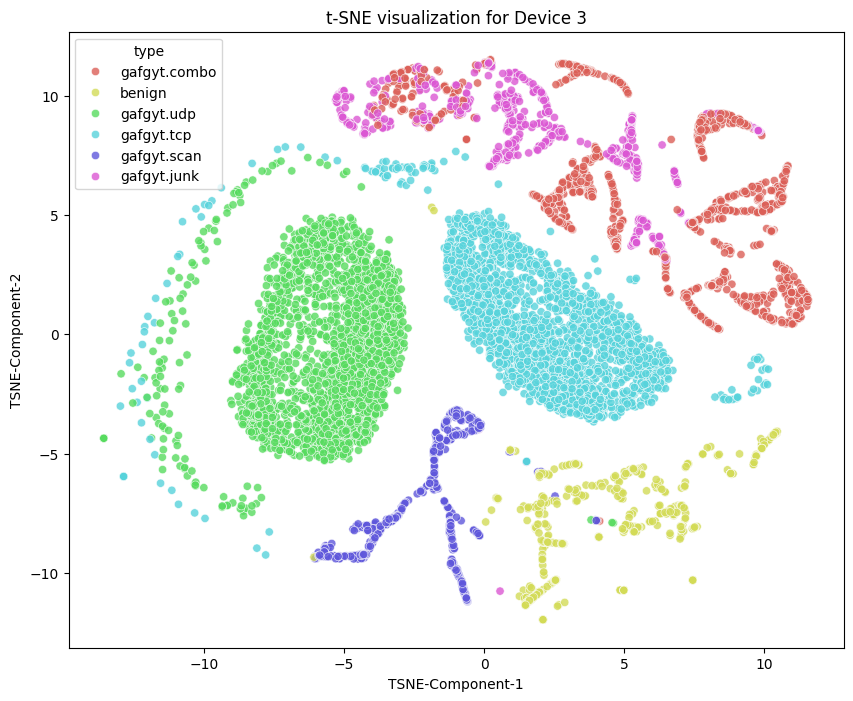

In [10]:
from sklearn.manifold import TSNE
import seaborn as sns

# Use the combined dataframe for device 3
# Assuming 'df' contains the data for device 3 as loaded previously
X_device = df.drop(columns=['type'])
y_device = df['type']

# Scale features for the single device data
scaler_device = StandardScaler()
X_scaled_device = scaler_device.fit_transform(X_device)

# Select a subset of the data for t-SNE
# Adjust the fraction or number of samples as needed based on computational resources
subset_size = 10000
if X_scaled_device.shape[0] > subset_size:
    np.random.seed(42) # for reproducibility
    subset_indices = np.random.choice(X_scaled_device.shape[0], subset_size, replace=False)
    X_subset = X_scaled_device[subset_indices]
    y_subset = y_device[subset_indices]
else:
    X_subset = X_scaled_device
    y_subset = y_device


# Perform t-SNE
# Adjust perplexity and n_iter based on your data and desired visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_subset)

# Create a DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE-Component-1', 'TSNE-Component-2'])
tsne_df['type'] = y_subset.reset_index(drop=True) # Ensure index aligns

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="TSNE-Component-1", y="TSNE-Component-2",
    hue="type",
    palette=sns.color_palette("hls", len(y_subset.unique())),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE visualization for Device 3')
plt.show()

## Visualize different TSNE components for further data analysis

In [15]:
# Run t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30, max_iter=300)
X_tsne = tsne.fit_transform(X_subset)

# Create DataFrame
tsne_df = pd.DataFrame(
    data=X_tsne,
    columns=['TSNE-Component-1', 'TSNE-Component-2', 'TSNE-Component-3']
)
tsne_df['type'] = y_subset.reset_index(drop=True)

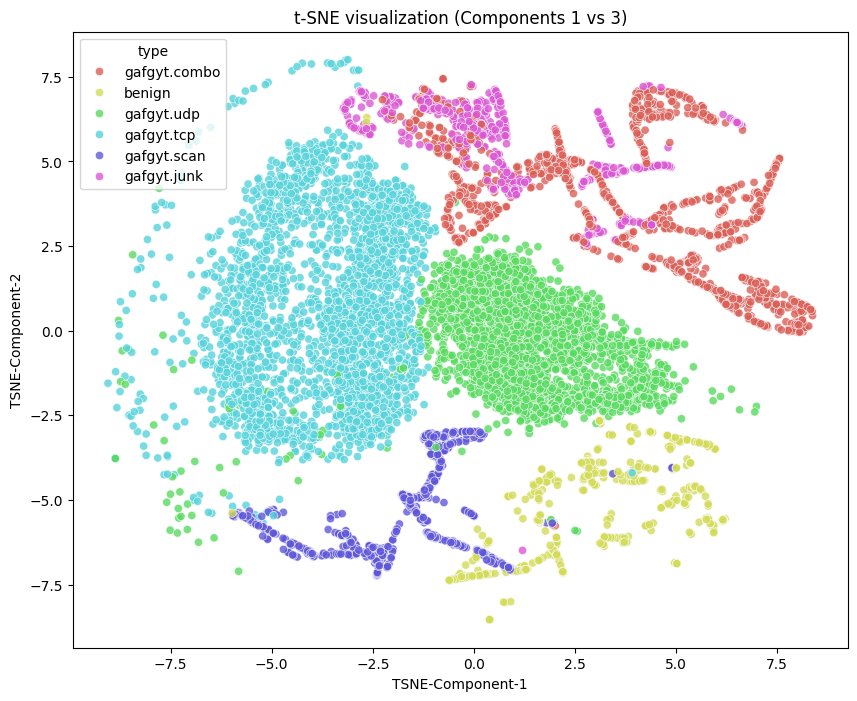

In [16]:

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="TSNE-Component-1", y="TSNE-Component-2",
    hue="type",
    palette=sns.color_palette("hls", len(y_subset.unique())),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE visualization (Components 1 vs 3)')
plt.show()



In [ ]:
df["HpHp_L0.1_pcc"].unique()

# Random Forest Model

In [ ]:
X_full = df.drop(columns=['type'])
y_full = df['type']

# Step 2: Split into train and test sets FIRST
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.3, random_state=42, stratify=y_full # Added stratify for balanced splits
)

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 3: Fit Scaler ONLY on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)

# Step 4: Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test_raw)  # Use transform, NOT fit_transform

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42, max_depth=10)
rf.fit(X_train_scaled, y_train_encoded)

# Step 6: Make Predictions
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

# Step 7: Evaluate the Model
print("\n--- Random Forest Model Performance (Device 3) ---")
print("Train Accuracy:", accuracy_score(y_train_encoded, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test_encoded, y_pred_test))
print("Train F1 (Weighted):", f1_score(y_train_encoded, y_pred_train, average='weighted'))
print("Test F1 (Weighted):", f1_score(y_test_encoded, y_pred_test, average='weighted'))

print("\nClassification Report (Test Set):\n", classification_report(y_test_encoded, y_pred_test, target_names=le.classes_))

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Stratified Cross Validation

In [ ]:

# cv_scores = cross_val_score(rf, X_train_scaled, y_train_encoded, cv=5, scoring='f1_weighted')
# print(f"\nCross-Validation F1 Score (Weighted): {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


# SVM


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("\n--- SVM Model Performance (Device 3) ---")
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Test F1 (Weighted):", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nClassification Report (SVM - Test Set):\n", classification_report(y_test, y_pred_svm))


# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter for convergence
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print("\n--- Logistic Regression Model Performance (Device 3) ---")
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Test F1 (Weighted):", f1_score(y_test, y_pred_lr, average='weighted'))

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)

print("\n--- k-NN Model Performance (Device 3) ---")
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Test F1 (Weighted):", f1_score(y_test, y_pred_knn, average='weighted'))